In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
PATH = Path("/Users/c24102394/Desktop/PA-symptomology")

In [11]:
df = pd.read_csv(PATH / "Experiments/Per-day-prediction /Data/Symptomtrackingdata_csv-cleaned_with_vars_ml_ready.csv")

In [12]:
df.columns

Index(['id', 'day', 'W_t', 'S_t', 'U_t', 'w_t', 'q_t', 'wq', 'w_t2', 'q_t2',
       'total_symptom_score', 'symptom_count', 'max_symptom_score',
       'symptom_variability', 'cognitive_mean', 'neuro_mean',
       'painfatigue_mean', 'is_treated', 'treatment_type', 'day.1',
       'days_since_start', 'days_since_treatment_start', 'treated_today',
       'treated_yday', 'treated_last3_any', 'days_since_last_treat', 'dow',
       'dow_sin', 'dow_cos', 'W_t_lag1', 'S_t_lag1', 'U_t_lag1', 'W_t_lag2',
       'S_t_lag2', 'U_t_lag2', 'W_t_lag7', 'S_t_lag7', 'U_t_lag7', 'dW_t',
       'dS_t', 'dU_t', 'W_t_roll3_mean', 'S_t_roll3_mean', 'U_t_roll3_mean',
       'W_t_roll7_mean', 'S_t_roll7_mean', 'U_t_roll7_mean', 'W_t_roll7_std',
       'S_t_roll7_std', 'U_t_roll7_std', 'W_t_roll14_mean', 'S_t_roll14_mean',
       'U_t_roll14_mean', 'W_t_roll14_std', 'S_t_roll14_std', 'U_t_roll14_std',
       'W_t_ewm_a03', 'S_t_ewm_a03', 'U_t_ewm_a03', 'W_t_ewm_a10',
       'S_t_ewm_a10', 'U_t_ewm_a10', 'U_ru

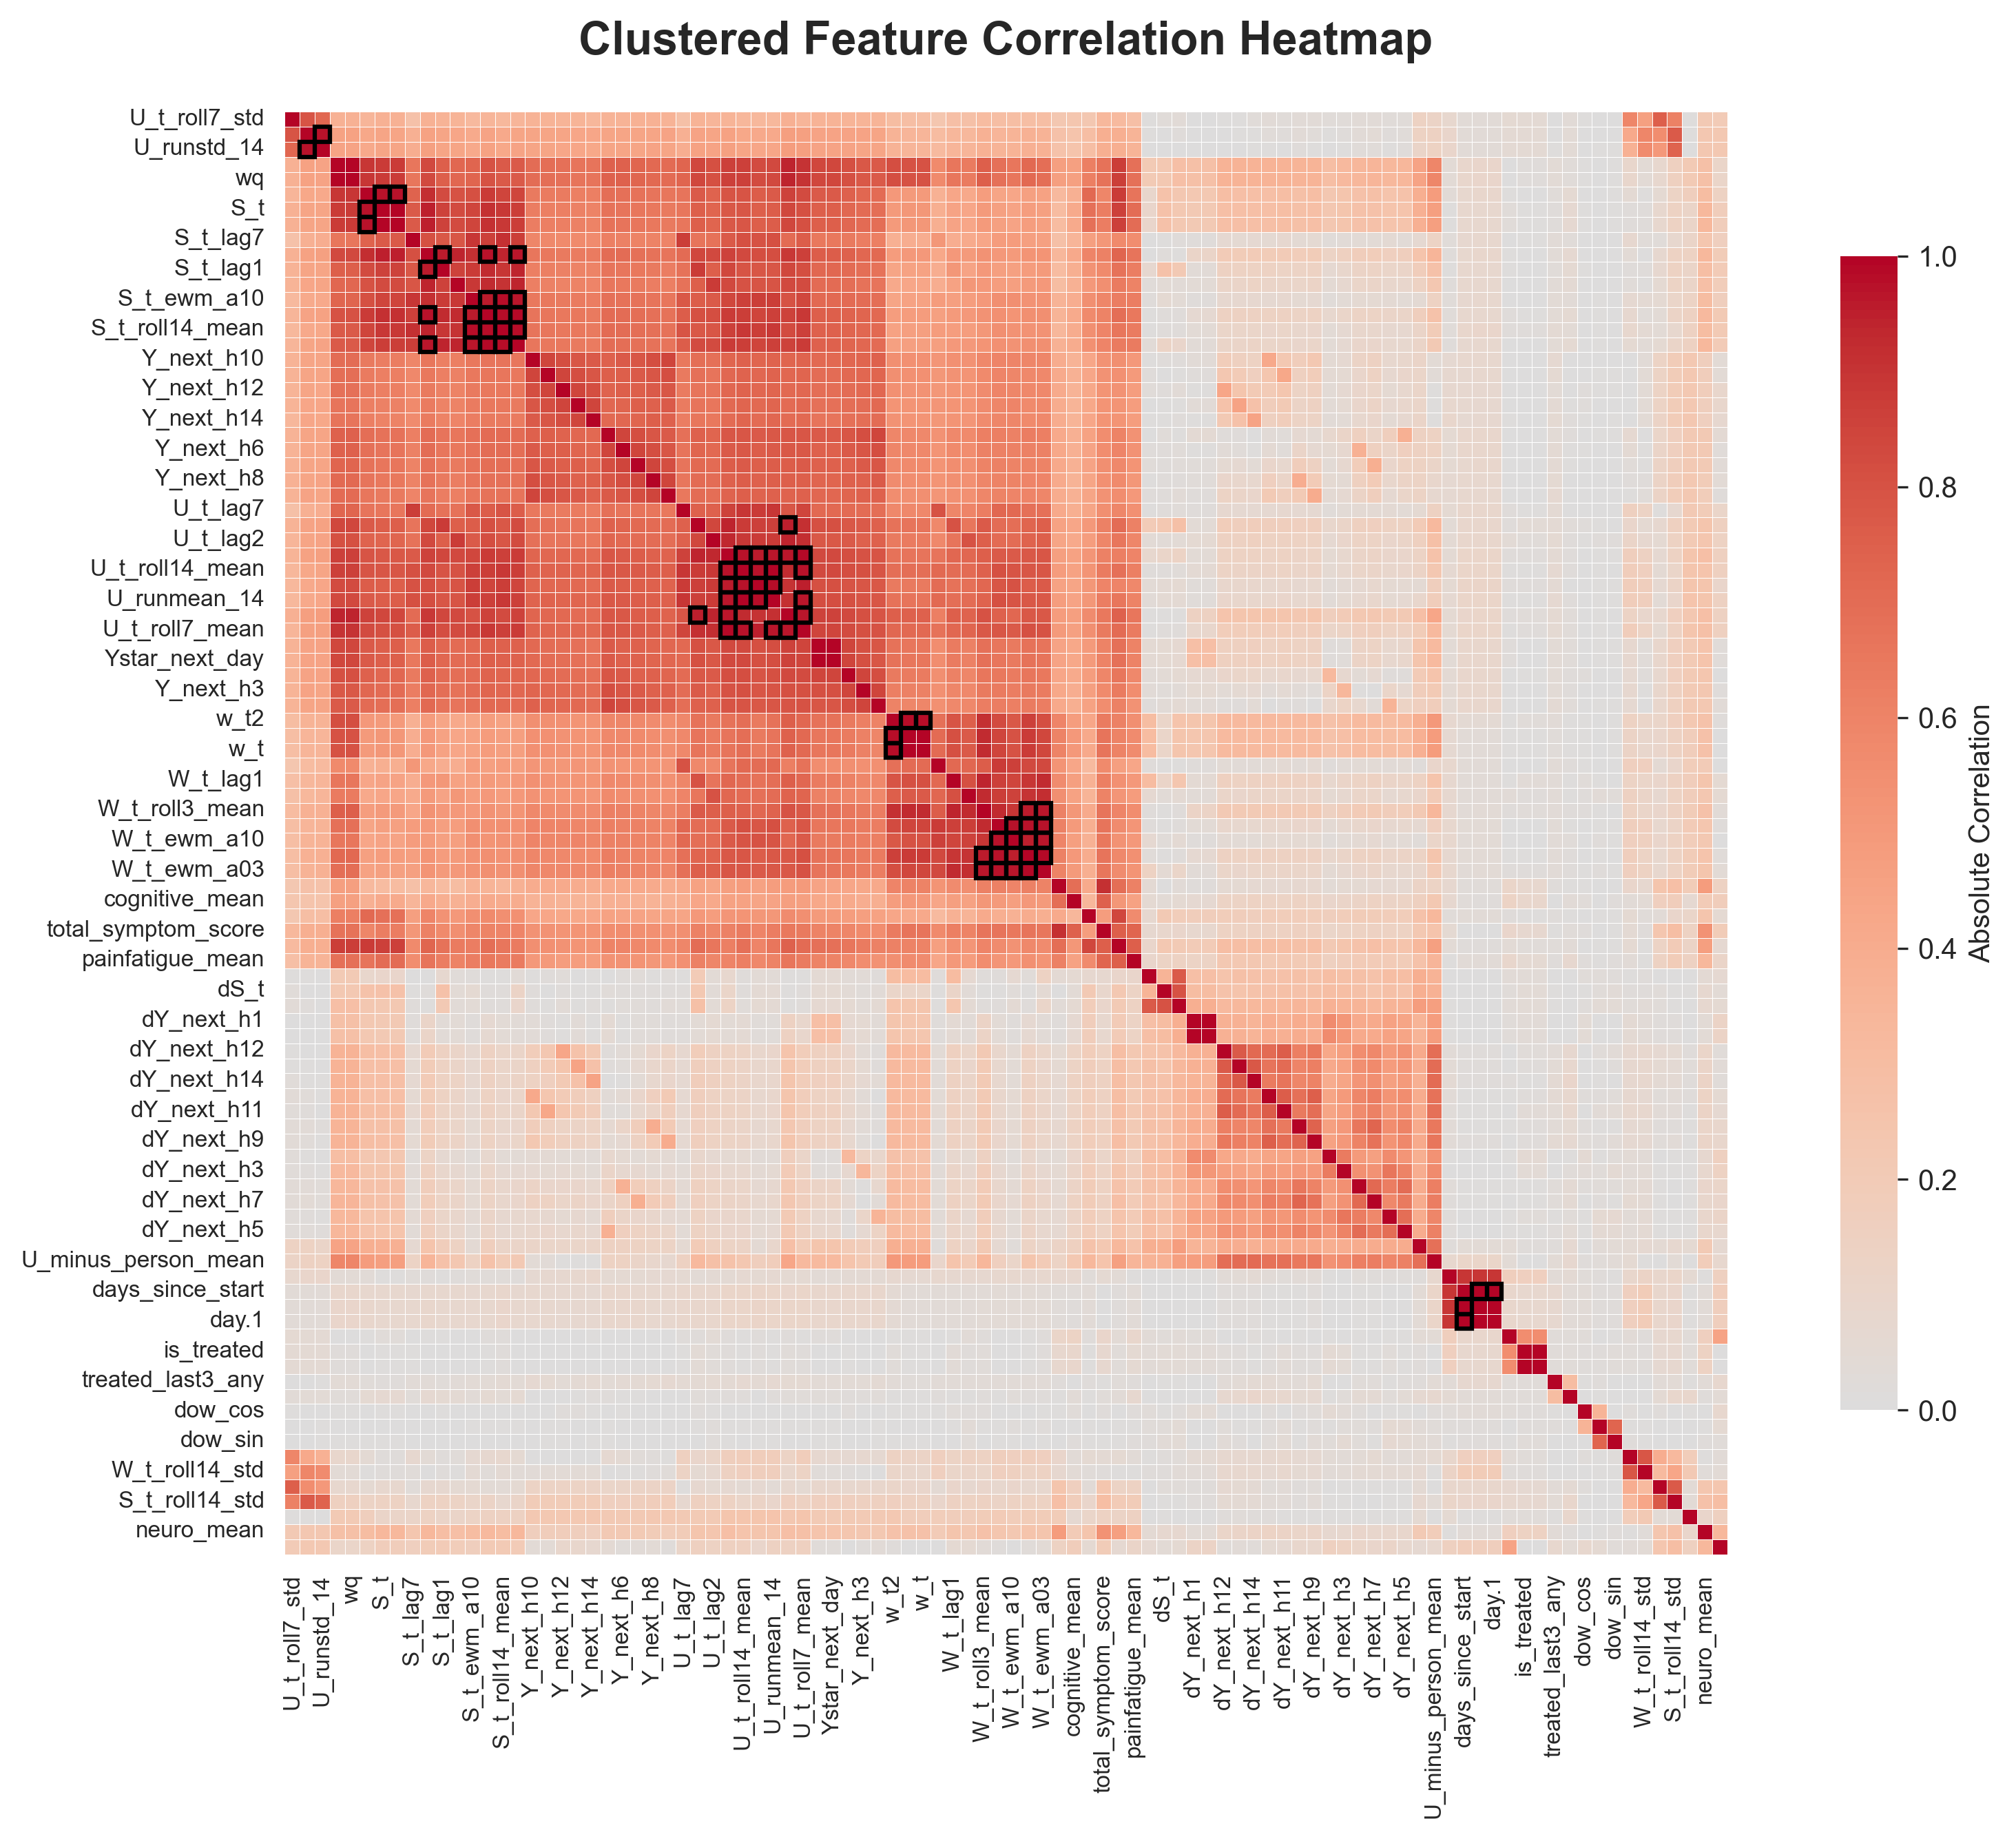

In [16]:
corr = df.corr(numeric_only=True).abs().replace([np.inf, -np.inf], np.nan).dropna(how="all").fillna(0)
g = sns.clustermap(corr, cmap="coolwarm", center=0, vmin=0, vmax=1, figsize=(12, 9))
plt.close(g.fig)
corr_clustered = corr.iloc[g.dendrogram_row.reordered_ind, g.dendrogram_col.reordered_ind]

plt.figure(figsize=(12, 9), dpi=300)
ax = sns.heatmap(
    corr_clustered, cmap="coolwarm", center=0, vmin=0, vmax=1,
    square=True, cbar_kws={"shrink": 0.8, "label": "Absolute Correlation"},
    linewidths=0.2, linecolor="white"
)

r95 = np.where((corr_clustered > 0.95) & (corr_clustered < 1))
for i, j in zip(*r95):
    ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor="black", lw=1.5))

plt.title("Clustered Feature Correlation Heatmap", fontsize=16, weight="bold", pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

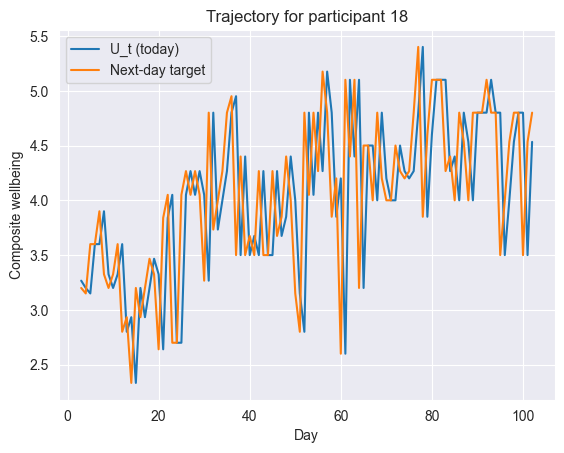

In [14]:
pid = df["id"].iloc[0]
tmp = df[df["id"] == pid]

plt.plot(tmp["day"], tmp["U_t"], label="U_t (today)")
plt.plot(tmp["day"], tmp["Ystar_next_day"], label="Next-day target")
plt.xlabel("Day"); plt.ylabel("Composite wellbeing")
plt.title(f"Trajectory for participant {pid}")
plt.legend(); plt.show()